# ¡Hola, Aldo!  

Mi nombre es Francisco Benavides, soy code reviewer de Tripleten y voy a revisar el proyecto que acabas de desarrollar.


Cada ves que vea un error por primera vez, lo señalaré. Deberás encontrarlo y arreglarlo, ya que buscamos que te prepares para un trabajo real, en el cual tu líder de equipo hará lo mismo. Si no puedes solucionar el error, te brindaré algunos tips más especificos la proxima vez.

Podrás encontrar mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer cuidadosamente cada una de tus implementaciones que has llevado a cabo para complir con tu informe. Cada uno de mis comentarios tiene el siguiente código de colores:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Si encuentras que es necesario, puedes responderme de esta forma: 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>

Mucho éxito!

# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [5]:
# importar librerías
import pandas as pd
from matplotlib import pyplot as plt
import statistics

In [6]:
# leer conjuntos de datos en los DataFrames
instacart_orders = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_3/instacart_orders.csv', sep=';')
products = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_3/products.csv', sep=';')
aisles = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_3/aisles.csv', sep=';')
departments = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_3/departments.csv', sep=';')
order_products = pd.read_csv('C:/Users/aldo_/OneDrive/Documentos/My Learning/Bootcamp/DataSets/Sprint_3/order_products.csv', sep=';')

In [7]:
# mostrar información del DataFrame instacart_orders
instacart_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [8]:
# mostrar información del DataFrame products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
# mostrar información del DataFrame aisles
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
# mostrar información del DataFrame departments
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [11]:
# mostrar información del DataFrame order_products
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

* En el data frame de instacart_orders, se encontraron 478967 valores en todas las columnas, a excepción de days_since_prior_order con 450148.

* En el data frame de products, se encontraron 49694 valores en las columnas, a excepción de product_name con 48436.

* En el data frame de aisles con 134 valores en todas sus columnas.

* En el data frame de departments con 21 valores en todas sus columnas.

* En el data frame de order_products, se encontraron 4545007 valores en todas las columnas, a excepción de add_to_cart_order con 4544171.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen analisis del estado inicial de los datos :D
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

El plan es simple, analizar cada conjunto de datos y quedarnos con toda la información que sea de utilidad. Es decir, limpiar y filtrar todos los datos que esten incompletos y duplicados.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [12]:
# Revisa si hay pedidos duplicados
print(instacart_orders.duplicated(subset='order_id').sum())

15


In [13]:
print(instacart_orders[instacart_orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Contamos con 15 valores duplicados, y en todos los casos de valores duplicados se han comprado en miércoles a las 2 a.m.

In [14]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(instacart_orders[
    (instacart_orders['order_dow']==3) 
    & 
    (instacart_orders['order_hour_of_day']==2)
].count())

order_id                  121
user_id                   121
order_number              121
order_dow                 121
order_hour_of_day         121
days_since_prior_order    114
dtype: int64


¿Qué sugiere este resultado?

Tenemos en total 121 pedidos que se realizaron el miércoles a las 2 a.m., de los cuales 15 son duplicados. Es decir que esperamos haya 106 pedidos realizados el miércoles a las 2 a.m.

In [15]:
# Elimina los pedidos duplicados
instacart_orders = instacart_orders.drop_duplicates().reset_index(drop=True)

In [16]:
# Vuelve a verificar si hay filas duplicadas
print(instacart_orders.duplicated().sum())

0


In [17]:
# Vuelve a verificar si hay IDs duplicados de pedidos
print(instacart_orders.duplicated(subset='order_id').unique())

[False]


Describe brevemente tus hallazgos y lo que hiciste con ellos

Se descubrió que algunos pedidos realizados en miércoles a las 2 a.m. se duplicaban, para ello filtramos aquellos registros duplicados y los eliminamos para que no afecte al análisis que se realizará y al final se comprueba que no haya valores duplicados.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo analizando los duplicados de lsa ordenes
</div>

### `products` data frame

In [18]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [19]:
# Verifica si hay IDs duplicadas de productos
print(products.duplicated(subset='product_id').sum())

0


In [20]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['prod_name_modf'] = products['product_name'].str.upper()
print(products.duplicated(subset='prod_name_modf').sum())

1361


In [21]:
# Revisa si hay nombres duplicados de productos no faltantes
print('Valores duplicados:', products.duplicated(subset='prod_name_modf').sum())
print('Valores nulos (faltantes):', products['prod_name_modf'].isna().sum())
print('Valores no faltantes duplicados:', products[~products['prod_name_modf'].isna()].duplicated(subset='prod_name_modf').sum())

Valores duplicados: 1361
Valores nulos (faltantes): 1258
Valores no faltantes duplicados: 104


In [22]:
print(products[(~products['prod_name_modf'].isna()) & (products['prod_name_modf'].duplicated())]['product_id'].duplicated().sum())


0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Como vimos en un inicio, hay 1258 valores ausentes en la columna product_name, lo que nos indica que al buscar valores duplicados en esa misma columna, obtendremos 1257 valores duplicados, ya que hay 1258 valores de tipo 'NAN'. Pero al convertir todos los nombres en mayúsculas encontramos que hay 1361 valores duplicados. Suponemos que al restar (1361-1258=103) tenemos 103 valores repetidos, diferentes de 'NAN'. Obtenemos 104 ya que hay un valor repetido una vez adicional a los demás.

Sin embargo, verificamos que estos 104 valores repetidos no tuvieran un 'product_id' repetido, y como encontramos en la celda anterior, no podemos afirmar que hay valores duplicados, pues los 'product_id' de aquellos productos con nombres en mayúsculas duplicados no se repiten.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**solucionado**
Lo que identifica un producto de manera unica es product_id no product_name, por lo que estos productos NO necesariamente son duplicados
</div>

### `departments` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
print('Filas duplicadas: ', departments.duplicated().sum())

Filas duplicadas:  0


In [24]:
# Revisa si hay IDs duplicadas de productos
print('IDs duplicados: ', departments.duplicated('department_id').sum())
print('Nombres duplicados: ', departments.duplicated('department').sum())

IDs duplicados:  0
Nombres duplicados:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se hayaron ID´s, nombres o filas duplicadas.

### `aisles` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
print('Filas duplicadas: ', aisles.duplicated().sum())

Filas duplicadas:  0


In [26]:
# Revisa si hay IDs duplicadas de productos
print('IDs duplicados: ', aisles.duplicated('aisle_id').sum())
print('Nombres duplicados: ', aisles.duplicated('aisle').sum())

IDs duplicados:  0
Nombres duplicados:  0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

No se hayaron ID´s, nombres o filas duplicadas.

### `order_products` data frame

In [27]:
# Revisa si hay filas totalmente duplicadas
print('Filas duplicadas: ', order_products.duplicated().sum())

Filas duplicadas:  0


In [28]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products.groupby('order_id').count())#.groupby('order_id').count())

          product_id  add_to_cart_order  reordered
order_id                                          
4                 13                 13         13
9                 15                 15         15
11                 5                  5          5
19                 3                  3          3
20                 8                  8          8
...              ...                ...        ...
3421034           17                 17         17
3421053            9                  9          9
3421071            5                  5          5
3421077            4                  4          4
3421079            1                  1          1

[450046 rows x 3 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Dado que no hay filas repetidas, es difícil demostrar que exista cualquier otro caso duplicado, pues como cada fila representa un artículo pedido en un pedido, no podemos afirmar que haya cualquier otro caso de duplicado, a menos que contemos con mayor información coomo fecha y hora en la que se realizo cada pedido.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con estos 3 ultimos dataframes
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [29]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products.isna().sum())

product_id           0
product_name      1258
aisle_id             0
department_id        0
prod_name_modf    1258
dtype: int64


Describe brevemente cuáles son tus hallazgos.

Hay 1258 valores ausentes en las columnas 'product_name' y 'prod_name_modf'

In [30]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?

print(products[(products['product_name'].isna()) & (products['aisle_id']==100)].count())

product_id        1258
product_name         0
aisle_id          1258
department_id     1258
prod_name_modf       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.

Nos dimos cuenta de que todos aquellos valores ausentes pertenecían al pasillo 100 y el departamento 21.

In [31]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?

print(products[(products['product_name'].isna()) & (products['department_id']==21)].count())

product_id        1258
product_name         0
aisle_id          1258
department_id     1258
prod_name_modf       0
dtype: int64


Describe brevemente cuáles son tus hallazgos.

En la sección anterior nos dimos cuenta de que todos aquellos valores ausentes pertenecían al pasillo 100 y el departamento 21.

In [32]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(departments[departments['department_id']==21])
print(aisles[aisles['aisle_id']==100])

    department_id department
20             21    missing
    aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.

Tanto el pasillo como el departamento, son valores desconocidos.

In [33]:
# Completa los nombres de productos ausentes con 'Unknown'


products['product_name'] = products['product_name'].fillna('Unknow')
products['prod_name_modf'] = products['prod_name_modf'].fillna('Unknow')
print(products[products['product_name']=='Unknow'])




       product_id product_name  aisle_id  department_id prod_name_modf
37             38       Unknow       100             21         Unknow
71             72       Unknow       100             21         Unknow
109           110       Unknow       100             21         Unknow
296           297       Unknow       100             21         Unknow
416           417       Unknow       100             21         Unknow
...           ...          ...       ...            ...            ...
49552       49553       Unknow       100             21         Unknow
49574       49575       Unknow       100             21         Unknow
49640       49641       Unknow       100             21         Unknow
49663       49664       Unknow       100             21         Unknow
49668       49669       Unknow       100             21         Unknow

[1258 rows x 5 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Renombramos todos aquellos valores ausentes de manera exitosa.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**solucionado**
    
Si bien, tu analisis en la parte superior esta correcto y tus conclusiones son acertadas, es mejor que lo traigas a esta parte por dos motivos:
    
1° Cuando revises los ids, te daras cuenta que no habran duplicados de productos no nulos.

2° Un tema de orden.

Si prefieres dejarlo como esta, tambien es valido, pero dejo el comentario para recalcar que en el punto anterior el identificar unico es product_id no product_name

</div>

### `orders` data frame

In [34]:
# Encuentra los valores ausentes
print(instacart_orders.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(instacart_orders[
    (instacart_orders['days_since_prior_order'].isna()) 
    & 
    (instacart_orders['order_number']>1)
    ])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al parecer, todos aquellos valores ausentes en la columna 'days_since_prior_order' existen porque no se había realizado un pedido anterior a ese, es decir, han sido los primeros pedidos que se realizan por cada cliente.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Exactamente! muy buena observacion
</div>

### `order_products` data frame

In [36]:
# Encuentra los valores ausentes
print(order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(order_products['add_to_cart_order'].max())
print(order_products['add_to_cart_order'].min())

64.0
1.0


Describe brevemente cuáles son tus hallazgos.

Al parecer, el pedido más grande fue de 64 artículos y el más pequeño fue de solo uno.

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_id_NaN = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
add_to_cart_order_id = pd.DataFrame(data=order_id_NaN, columns=['order_id'])
print(add_to_cart_order_id)

    order_id
0    2449164
1    1968313
2    2926893
3    1717990
4    1959075
..       ...
65      9310
66   2170451
67   2979697
68   1625713
69   1529171

[70 rows x 1 columns]


In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
print(order_products.merge(add_to_cart_order_id, on='order_id').groupby('order_id')['product_id'].count().min())

65


Describe brevemente cuáles son tus hallazgos.

Se descubrió que son 70 pedidos que contienen valores ausentes. De esos 70 pedidos, se confirma que todos tienen 65 o más productos.

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype('int')

Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al realizar este ejercicio, quise utilizar el parámetro 'inplace=True' en el método fillna(), pues consideré que era la mejor opción, pero descubrí que no puedes encadenar otra operación directamente después de un método con inplace=True. 🤯

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Exactamente, esto es por que con inplace señalas que guardas el resutlado de la operación, lo cual es una forma de "finalizar" el proceso, por asi decirlo
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

Es fundamental y de suma importancia pre-procesar la información de todos los data sets que se utilizarán para un análisi, pues este es un claro ejemplo de que no toda la info nos llega limpia. 

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
print(instacart_orders['order_hour_of_day'].max())
print(instacart_orders['order_hour_of_day'].min())

23
0


In [42]:
print(instacart_orders['order_dow'].max())
print(instacart_orders['order_dow'].min())

6
0


Escribe aquí tus conclusiones

Se comprueba que los valores de 'order_hour_of_day' oscilan entre 0 y 23. Mientras que los valores de 'order_dow' se encuentran entre 0 y 6.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

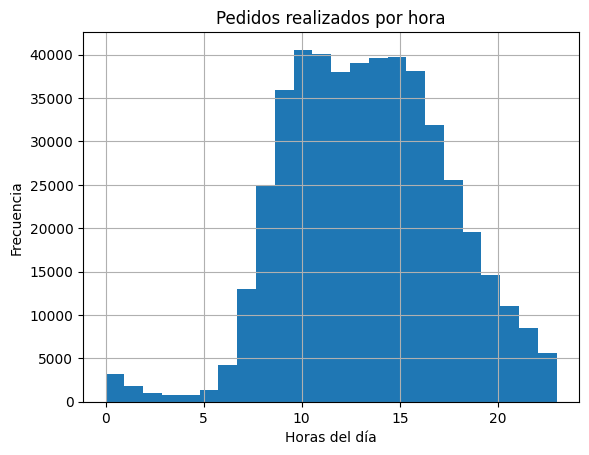

In [43]:
instacart_orders.hist(column='order_hour_of_day', bins=24)
plt.title('Pedidos realizados por hora')
plt.xlabel('Horas del día') 
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones

Entre las 8:00 y 18:00 son las horas en las que se realizan la mayor cantidad de pedidos. Sin embargo, las horas en las que mayor demanda hay se encuentra entre las 10:00 y 15:00. Por el contrario, de 20:00 a 7:00 son las horas en las que se realizan menos cantidad de pedidos, siendo de la 1:00 a las 5:00 las horas en las que menor demanda hay.

### [A3] ¿Qué día de la semana compran víveres las personas?

In [44]:
print(instacart_orders['order_dow'].value_counts())

order_dow
0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: count, dtype: int64


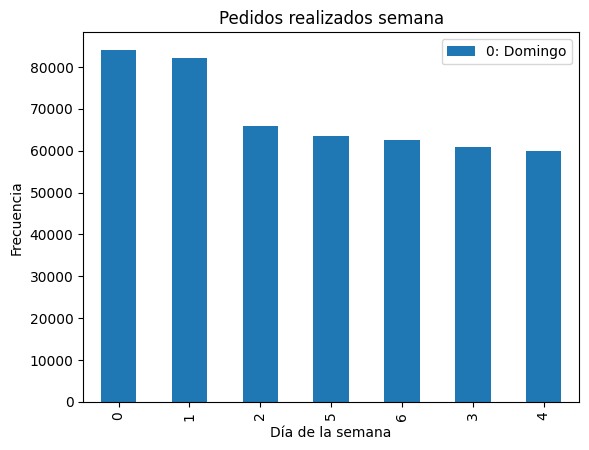

In [45]:
instacart_orders['order_dow'].value_counts().plot(x='order_dow', kind='bar')
plt.title('Pedidos realizados semana')
plt.xlabel('Día de la semana') 
plt.ylabel('Frecuencia')
plt.legend(['0: Domingo'])
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
**solucionado**
Cambia este gráfico por uno de barras. Para los gráficos de barra, recuerda que primero debes calcular la información y luego gráficarla
</div>

Escribe aquí tus conclusiones

El domingo y el lunes son los días con mayor demanda en pedidos, mientras que de martes a sábado se mantiene "constante" el número de pédidos.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

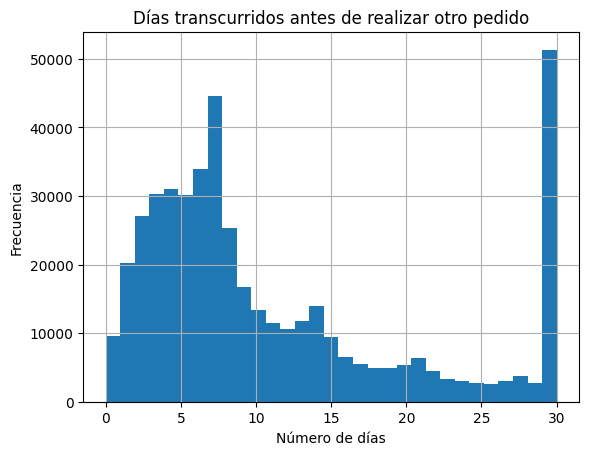

In [46]:
instacart_orders.hist(column='days_since_prior_order', bins=31)
plt.title('Días transcurridos antes de realizar otro pedido')
plt.xlabel('Número de días') 
plt.ylabel('Frecuencia')
plt.show()

Escribe aquí tus conclusiones

En gran parte, los clientes esperan un mes o una semana para volver a relaizar un nuevo pedido. Sin embargo, es notorio que hay una mayor parte de los clientes que esperan 30 días para realizar otro pedido. De lo contrario la gente es muy poca la gente que vuelve a realizar otro pedido después de haber transcurrido entre 16 y 29 días.

Algo curioso, es que sus valor mínimo que es 0, tiene una frecuencia de casi 10,000, esto quere decir que hay más clientes que vuelven a pedir sin que haya pasado más de un día de su último pedido en comparación de aquellos clientes que vuelven a pedir después de 16 o 29 días. Por otro lado, su valor máximo que son 30 días, tiene la mayor frecuencia de todos los datos, esto quiere decir que es más probable que la gente vuelva a realizar un pedido después de haber transcurrido 30 días.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo en general en la parte A
</div>

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [47]:
# Información de los miércoles.
ohod_mier = instacart_orders[instacart_orders['order_dow']==3]['order_hour_of_day']
# Información de los sabádos.
ohod_saba = instacart_orders[instacart_orders['order_dow']==6]['order_hour_of_day']

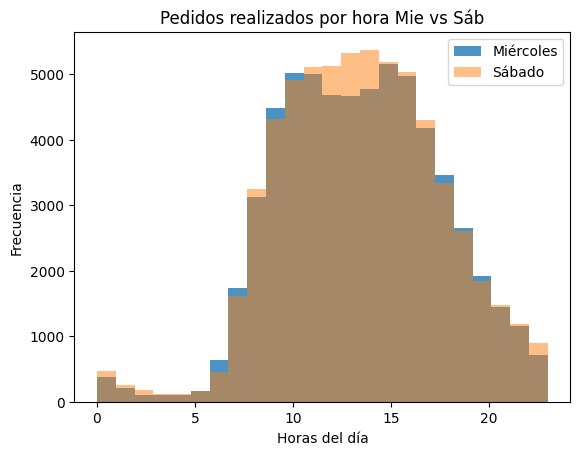

In [48]:
ohod_mier.plot(kind='hist', bins=24, alpha=0.8)
ohod_saba.plot(kind='hist', bins=24, alpha=0.5)
plt.title('Pedidos realizados por hora Mie vs Sáb')
plt.xlabel('Horas del día') 
plt.ylabel('Frecuencia')
plt.legend(['Miércoles', 'Sábado'])
plt.show()

Escribe aquí tus conclusiones

Las diferencias son muy pocas, pues la más notoria es que los días sábados hay más clientes que solicitan productos entre las 10:00 y 16:00 horas. En su mayoría, siguen las mismas distribuciones, sin embargo es notorio que hay horas en las que un día es mayor que otro, pero por pequeñas cantidades.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

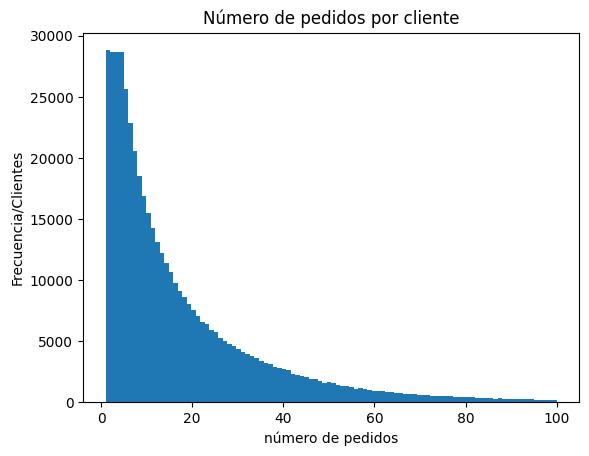

In [49]:
instacart_orders['order_number'].plot(kind='hist', bins=100)
plt.title('Número de pedidos por cliente')
plt.xlabel('número de pedidos') 
plt.ylabel('Frecuencia/Clientes')
plt.show()

Escribe aquí tus conclusiones

Como se muestra, hay una mayor cantidad de clientes que han hecho pocos pedidos, es decir, de 1 a 5. Mientras más pedidos se van solicitando, disminuye la cantidad de clientes que hacen esto, pues podría interpretarse como si fueran menos de 5000 clientes que realizan más de 50 pedidos.

Este histograma nos revela que la distribución de los números de pedidos por cliente, tiene una distribución de poisson, lo cual nos podría ayudar a determinara la probabilidad de que un cliente realice cierta cantidad de pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [50]:
prod_mas_pop = order_products['product_id'].value_counts().head(20).reset_index()
prod_mas_pop.columns = ['product_id', 'frequency']

In [51]:
print(prod_mas_pop)

    product_id  frequency
0        24852      66050
1        13176      53297
2        21137      37039
3        21903      33971
4        47209      29773
5        47766      24689
6        47626      21495
7        16797      20018
8        26209      19690
9        27845      19600
10       27966      19197
11       22935      15898
12       24964      15292
13       45007      14584
14       39275      13879
15       49683      13675
16       28204      12544
17        5876      12232
18        8277      11993
19       40706      11781


In [52]:
df = prod_mas_pop.merge(products, on='product_id')
df.index = df.index + 1
print(df[['product_id', 'product_name']])

    product_id              product_name
1        24852                    Banana
2        13176    Bag of Organic Bananas
3        21137      Organic Strawberries
4        21903      Organic Baby Spinach
5        47209      Organic Hass Avocado
6        47766           Organic Avocado
7        47626               Large Lemon
8        16797              Strawberries
9        26209                     Limes
10       27845        Organic Whole Milk
11       27966       Organic Raspberries
12       22935      Organic Yellow Onion
13       24964            Organic Garlic
14       45007          Organic Zucchini
15       39275       Organic Blueberries
16       49683            Cucumber Kirby
17       28204        Organic Fuji Apple
18        5876             Organic Lemon
19        8277  Apple Honeycrisp Organic
20       40706    Organic Grape Tomatoes


Escribe aquí tus conclusiones

Notamos que los 20 productos más pedidos, en su mayoría son frutas y verduras orgánicas. Siendo el platano el producto más pedido.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en la PArte B
</div>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [53]:
#Este df nos muestra el número de articulos por pedido.
prodxordr = order_products.groupby(by='order_id').count()['product_id']
print('La cantidad promedio de articulos que se realizan por pedido:', prodxordr.mean().round(2))
print('La cantidad de articulos que más se hacen por pedido:', statistics.mode(prodxordr))

La cantidad promedio de articulos que se realizan por pedido: 10.1
La cantidad de articulos que más se hacen por pedido: 5


In [54]:
#Aquí veremos el rango de la cantidad de productos en todos los pedidos
print('Los valores mínimo y máximo que se han realizado en pedidos son (', prodxordr.min(), ',', prodxordr.max(), ')')

Los valores mínimo y máximo que se han realizado en pedidos son ( 1 , 127 )


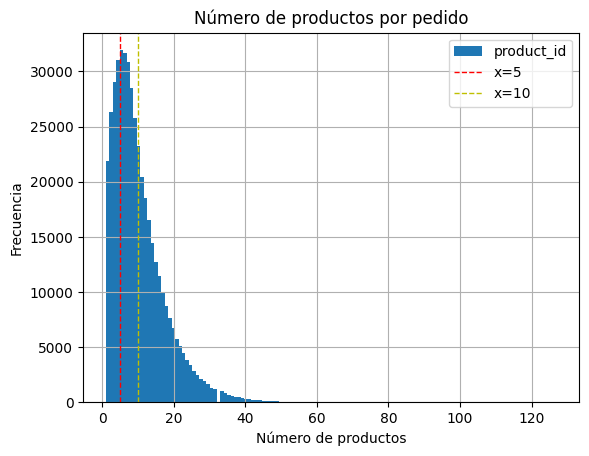

In [55]:
#Ahora veamos la distribución...
prodxordr.plot(kind='hist', bins=130)
plt.title('Número de productos por pedido')
plt.xlabel('Número de productos')
plt.ylabel('Frecuencia')
plt.axvline(x=5, color='r', linestyle='--', linewidth=1, label='x=5')
plt.axvline(x=10, color='y', linestyle='--', linewidth=1, label='x=10')
plt.grid()
plt.legend()
plt.show()

Escribe aquí tus conclusiones

Como pudimos ver, en promedio los clientes compran 10 productos por pedido, sin embargo, el histograma nos confirma el valor de la moda del número de productos por pedido, pues la cantidad de productos con mayor frecuencia está entre 1 y 10, siendo 5 el valor con mayor fracuencia en nuestro conjunto de datos de productos por pedido.

Este histograma nos revela que la distribución del números de productos por pedidos, tiene una distribución de poisson, lo cual nos podría ayudar a determinara la probabilidad de que un pedido tenga una cierta cantidad de productos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Gran trabajo en este punto!
</div>

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [56]:
reorder_prod = order_products[order_products['reordered']==1]['product_id'].value_counts().head(20).reset_index()
reorder_prod.columns = ['product_id', 'frequency']

In [57]:
print(reorder_prod)

    product_id  frequency
0        24852      55763
1        13176      44450
2        21137      28639
3        21903      26233
4        47209      23629
5        47766      18743
6        27845      16251
7        47626      15044
8        27966      14748
9        16797      13945
10       26209      13327
11       22935      11145
12       24964      10411
13       45007      10076
14       49683       9538
15       28204       8989
16        8277       8836
17       39275       8799
18        5876       8412
19       49235       8389


In [58]:
reorder_prod_top = reorder_prod.merge(products, on='product_id')
reorder_prod_top.index = reorder_prod_top.index + 1
print(reorder_prod_top[['product_id', 'product_name']])

    product_id              product_name
1        24852                    Banana
2        13176    Bag of Organic Bananas
3        21137      Organic Strawberries
4        21903      Organic Baby Spinach
5        47209      Organic Hass Avocado
6        47766           Organic Avocado
7        27845        Organic Whole Milk
8        47626               Large Lemon
9        27966       Organic Raspberries
10       16797              Strawberries
11       26209                     Limes
12       22935      Organic Yellow Onion
13       24964            Organic Garlic
14       45007          Organic Zucchini
15       49683            Cucumber Kirby
16       28204        Organic Fuji Apple
17        8277  Apple Honeycrisp Organic
18       39275       Organic Blueberries
19        5876             Organic Lemon
20       49235       Organic Half & Half


Escribe aquí tus conclusiones

La lista es muy similar a la lista de los productos más populares, tiene pocas variaciones, pero al igual que en la lista pasada, en primer lugar está el platano. Notamos que lo que se vuelve a comprar son frutas y verduras en su mayoría.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [59]:
#Para poder realizar este análisis, es necesario identificar si un producto se ha repetido dos veces 
#o más en un pedido. Para ello agruparemos el DataFrame por 'order_id' y 'product_id', luego 
#contaremos las ocurrencias de cada combinación (usando 'size()'). Esto quiere decir que si el 
#resultado nos muestra un valor, podremos afrimar que se repiten productos en un mismo pedido:

order_product_counts = order_products.groupby(['order_id', 'product_id']).size().reset_index(name='counts')
duplicate_products = order_product_counts[order_product_counts['counts'] > 1]
print(duplicate_products)

Empty DataFrame
Columns: [order_id, product_id, counts]
Index: []


In [60]:
ord_prod_id = order_products.groupby('product_id').agg(
    total_pedidos = ('reordered', 'count'),
    total_reorder = ('reordered', 'sum')
)

ord_prod_id['order_proportion'] = ((ord_prod_id['total_reorder']/ord_prod_id['total_pedidos'])*100).round(2)
print(ord_prod_id)

            total_pedidos  total_reorder  order_proportion
product_id                                                
1                     280            158             56.43
2                      11              0              0.00
3                      42             31             73.81
4                      49             25             51.02
7                       2              1             50.00
...                   ...            ...               ...
49690                   5              4             80.00
49691                  72             31             43.06
49692                  12              5             41.67
49693                  25             11             44.00
49694                   9              3             33.33

[45573 rows x 3 columns]


In [61]:
# Aquí hacemos una unión entre products y el DataFrame creado 'ord_prod_id' y llenamos con 0 todos
# aquellos valores que al empatar tengan un valor nulo. 
prop = products.merge(ord_prod_id, on='product_id', how='left').fillna(0)[['product_id', 
                                                                           'product_name',
                                                                           'total_pedidos', 
                                                                           'total_reorder', 
                                                                           'order_proportion']]
print(prop)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49689       49690                      HIGH PERFORMANCE ENERGY DRINK   
49690       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
49691       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
49692       49693                             SPRING WATER BODY WASH   
49693       49694                            BURRITO- STEAK & CHEESE   

       total_pedidos  total_reorder  order_proportion  
0              280.0          158.0             56.43  
1               11.0   

In [62]:
# Se pueden ver las 5 tasas de repetición de pedido más altas de manera porcentual en la columna 
print(prop.sort_values(['order_proportion'], ascending=False).head(5))

       product_id                                  product_name  \
49656       49657                             Cabernet Tomatoes   
12184       12185                        Whole Cleaned Calamari   
49660       49661                                         Porto   
49661       49662                  Bacon Cheddar Pretzel Pieces   
12110       12111  Parmesan & Garlic Kettle Cooked Potato Chips   

       total_pedidos  total_reorder  order_proportion  
49656            1.0            1.0             100.0  
12184            1.0            1.0             100.0  
49660            1.0            1.0             100.0  
49661            1.0            1.0             100.0  
12110            1.0            1.0             100.0  


Escribe aquí tus conclusiones

Podemos observar los 5 productos que más se piden y se vuelven a pedir son los platanos, y productos orgánicos como platanos, fresas, espinacas y aguacates.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
El problema era el sort_values, me tome la libertad de remover lo que hace que no se vieran los % más altos
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Hola Fransisco, muchas gracias por tus comentarios y ayuda :D

Estuve intentado calcular la tasa como me lo recomendaste pero no logro obtener tasas más altas, además de que no entiendo bien cómo es que debería realizar la operación con 'reordered'. Desde un inicio me guié de acuerdo a las indicaciones en las cuales mencionan la fórmula para obtener la tasa de repetición de pedido, es decir, esta: número de repeticiones de pedido/total de pedidos.

¿Me ayudas a identificar qué es en lo que estoy mal?
</div>

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [63]:
user_prop_merge = instacart_orders.merge(order_products, on='order_id', how='left')
user_prop = user_prop_merge.groupby(['user_id', 'product_id']).agg(
    total_pedidos = ('reordered', 'count'),
    total_reorder = ('reordered', 'sum')
)

user_prop['order_proportion'] = ((user_prop['total_reorder']/user_prop['total_pedidos'])*100).round(2)
print(user_prop)

                    total_pedidos  total_reorder  order_proportion
user_id product_id                                                
2       9681.0                  1            0.0               0.0
        12000.0                 1            0.0               0.0
        13176.0                 1            0.0               0.0
        16589.0                 1            0.0               0.0
        20574.0                 1            0.0               0.0
...                           ...            ...               ...
206209  39216.0                 1            0.0               0.0
        40992.0                 1            0.0               0.0
        41213.0                 1            1.0             100.0
        41665.0                 1            0.0               0.0
        43961.0                 1            0.0               0.0

[3381866 rows x 3 columns]


In [64]:
print(user_prop.sort_values(['order_proportion'], ascending=False).head(5))

                    total_pedidos  total_reorder  order_proportion
user_id product_id                                                
206209  41213.0                 1            1.0             100.0
206208  44910.0                 1            1.0             100.0
        44359.0                 1            1.0             100.0
        43295.0                 1            1.0             100.0
        43086.0                 3            3.0             100.0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
mismo caso de lo anterior :)
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Igualmente en esta parte no logro identificar el error o cómo es que podría corregir mi cálculo. ¿Me ayudarías a identificarlo?
</div>

Escribe aquí tus conclusiones

Es difícil mencionar la proporción de cada cliente por la cantidad de usarios que hay y la cantidad de productos que solicitan, sin embargo, podemos observar que el usuario [87130] ha solicitado 23 veces el producto [27845] en el total de todas sus ordenes, lo que indica que tiene una tasa del 100% de reordenar ese producto.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [65]:
rank_prod = order_products[order_products['add_to_cart_order']==1]['product_id'].value_counts().head(21).reset_index()
rank_prod.columns = ['product_id', 'frequency']
print(products.merge(rank_prod, on='product_id')[['product_id', 'product_name', 'frequency']].sort_values(by='frequency', ascending=False).reset_index(drop=True))

    product_id                 product_name  frequency
0        24852                       Banana      15562
1        13176       Bag of Organic Bananas      11026
2        27845           Organic Whole Milk       4363
3        21137         Organic Strawberries       3946
4        47209         Organic Hass Avocado       3390
5        21903         Organic Baby Spinach       3336
6        47766              Organic Avocado       3044
7        19660                 Spring Water       2336
8        16797                 Strawberries       2308
9        27966          Organic Raspberries       2024
10       44632   Sparkling Water Grapefruit       1914
11       49235          Organic Half & Half       1797
12       47626                  Large Lemon       1737
13         196                         Soda       1733
14       38689     Organic Reduced Fat Milk       1397
15       26209                        Limes       1370
16       12341                Hass Avocados       1340
17        

Escribe aquí tus conclusiones

Al igual que en los ejercicios pasados, nos percatamos de que los platanos son de los productos más comprados y no solo eso, si no que son los que las personas eligen primero al iniciar sus compras. En su mayoría la lista es similar a las listas de los ejercicios pasados, pues es de imaginar que entre mayor demanda de productos, mayor importancia le darán los clientes, por lo que los obligará a elegirlos primero que otros productos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo en este punto :)
</div>

### Conclusion general del proyecto:

'''
Para estos Data Set's, fue bastante claro que en cualquier análisis que se requiera hacer es 
fundamental pre-procesar la información, es decir, asegurarse de que la información esté libre de 
valores ausentes, duplicados o inconsistencias. Otra cosa que puedo concluir es que para poder 
resolver cualquiera de estos problemas siempre fue necesaria una etapa de análisis y comprensión de 
los datos, junto con su estructura. El graficar la información analizada es de bastante ayuda, pues 
es más fácil identificar aquellos fuertes y/o debilidades que se busca identificar.
'''